In [1]:
import datetime
today = datetime.date.today()
date = str(today)

url = "https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-%s.xlsx" % date

import pandas as pd
data = pd.read_excel(url)

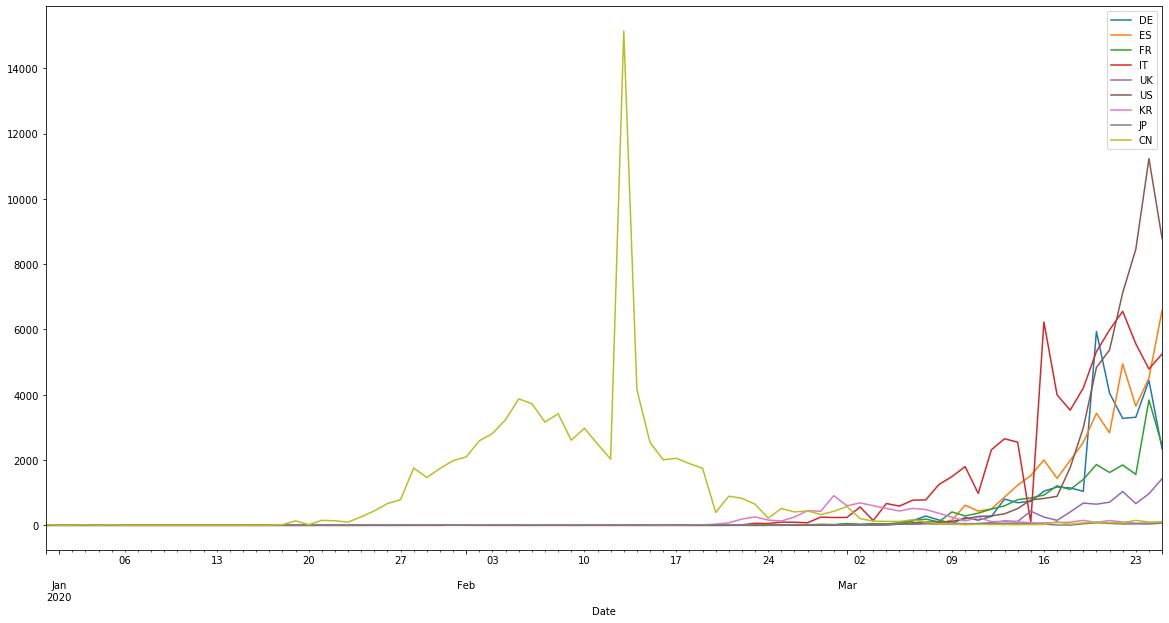

In [2]:
countries = ['DE', 'ES', 'FR', 'IT', 'UK', 'US', 'KR', 'JP', 'CN']

cases = pd.DataFrame(columns = ['Date'])

for country in countries:
    countryData = data[data['GeoId'] == country][['DateRep', 'Cases']]
    countryData.columns = ['Date', country]
    cases = pd.merge(cases, countryData, on='Date', how='right')

cases = cases.sort_values(by=['Date'])

cases.plot.line(x='Date', y=countries, figsize=(20, 10))

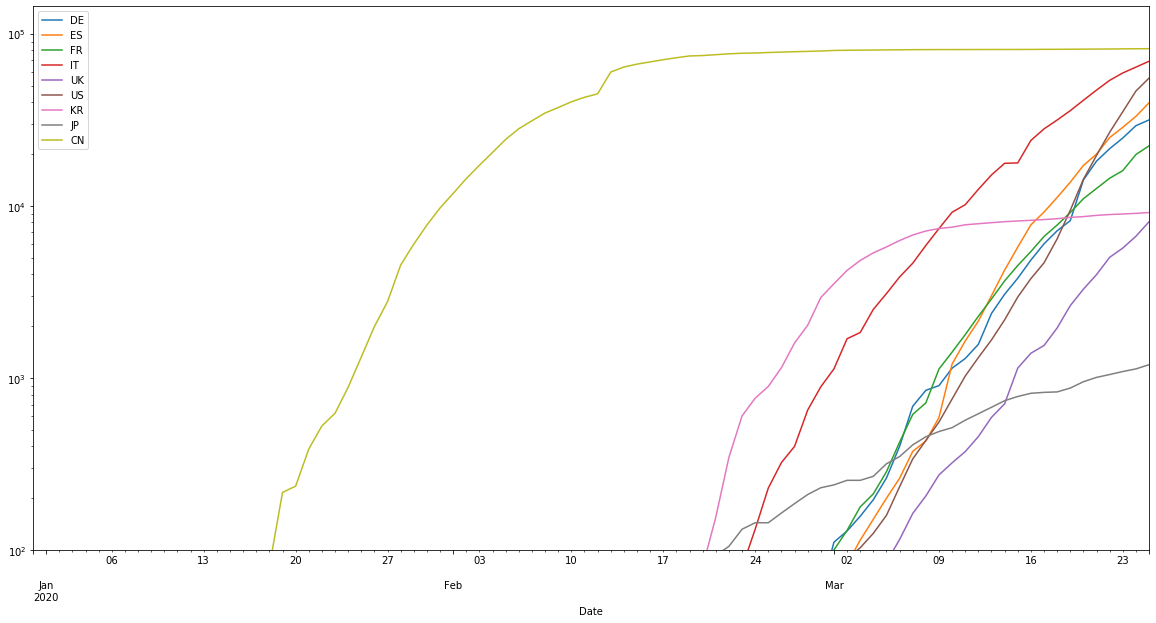

In [3]:
a = cases[countries].to_numpy()

for i in range(1, cases.shape[0]):
    a[i] = a[i] + a[i - 1]

sumCases = pd.DataFrame(data=a, index=cases['Date'], columns=countries)

sumCases.plot.line(logy=True, figsize=(20, 10), ylim=(100, None))

In [5]:
cases

,Date,DE,ES,FR,IT,UK,US,KR,JP,CN
85,2019-12-31,0,0,0,0,0,0,0,0,27
84,2020-01-01,0,0,0,0,0,0,0,0,0
83,2020-01-02,0,0,0,0,0,0,0,0,0
82,2020-01-03,0,0,0,0,0,0,0,0,17
81,2020-01-04,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
4,2020-03-21,4049,2833,1617,5986,706,5374,147,57,79
3,2020-03-22,3276,4946,1847,6557,1035,7123,98,39,83
2,2020-03-23,3311,3646,1559,5560,665,8459,64,43,150
1,2020-03-24,4438,4517,3838,4789,967,11236,76,39,99


In [6]:
sumCases

,DE,ES,FR,IT,UK,US,KR,JP,CN
Date,,,,,,,,,
2019-12-31,0,0,0,0,0,0,0,0,27
2020-01-01,0,0,0,0,0,0,0,0,27
2020-01-02,0,0,0,0,0,0,0,0,27
2020-01-03,0,0,0,0,0,0,0,0,44
2020-01-04,0,0,0,0,0,0,0,0,44
...,...,...,...,...,...,...,...,...,...
2020-03-21,18187,19980,12612,47021,3983,19624,8799,1007,81416
2020-03-22,21463,24926,14459,53578,5018,26747,8897,1046,81499
2020-03-23,24774,28572,16018,59138,5683,35206,8961,1089,81649
